In [ ]:
from google.colab import files
uploaded = files.upload()

Saving austin.csv to austin.csv


In [ ]:
import pandas as pd

df= pd.read_csv('austin.csv')

In [ ]:
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,21-12-2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,22-12-2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,Nan
2,23-12-2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,Nan
3,24-12-2013,61,46,31,36,28,21,89,56,22,...,30.45,30.30,10,10,7,12,4,20,0,Nan
4,25-12-2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,Nan


In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()
replaced_df = df
#replaced_df['Events'].astype('|S80')
# replaced_df.dtypes
replaced_df['Events']=labelencoder.fit_transform(replaced_df['Events'])
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,21-12-2013,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,6
1,22-12-2013,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,3
2,23-12-2013,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,3
3,24-12-2013,61,46,31,36,28,21,89,56,22,...,30.45,30.30,10,10,7,12,4,20,0,3
4,25-12-2013,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,3


In [ ]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [ ]:
x = df.iloc[:, [3,18]].values  


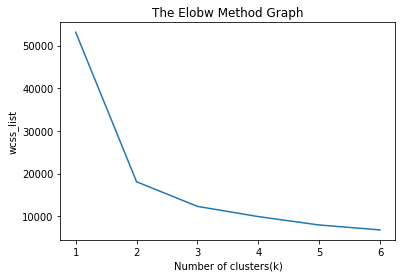

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 6.  
for i in range(1, 7):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 7), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

In [ ]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=6, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

In [ ]:
y_predict

array([3, 5, 1, 1, 5, 5, 5, 5, 1, 1, 5, 5, 1, 1, 3, 1, 1, 1, 5, 0, 0, 5,
       5, 3, 1, 5, 5, 5, 5, 5, 3, 5, 5, 1, 1, 1, 5, 1, 1, 1, 1, 0, 0, 1,
       1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 3, 5, 0, 0, 0, 0, 0, 5, 5, 0, 0,
       0, 1, 1, 5, 3, 1, 1, 1, 5, 5, 5, 5, 5, 5, 0, 3, 5, 3, 0, 3, 5, 3,
       3, 5, 0, 0, 3, 5, 5, 3, 0, 2, 0, 3, 0, 2, 2, 4, 3, 0, 0, 3, 3, 5,
       3, 0, 2, 2, 3, 5, 5, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 4, 4, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 3, 3, 5, 0, 0, 0, 2, 2, 2, 4, 4,
       4, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4,
       4], dtype=int32)

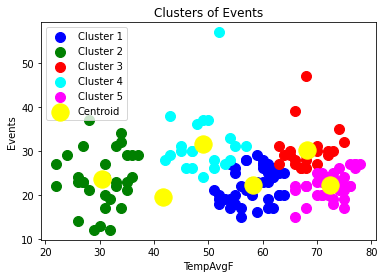

In [ ]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of Events')  
mtp.xlabel('TempAvgF')  
mtp.ylabel('Events')  
mtp.legend()  
mtp.show()  